In [37]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [5]:
data = pd.read_csv("./edt-ts/data/running.csv")

data.head(20)

,uuid,timestamp,event,temperature
0,1001,2021-11-19 11:16:08,Load Cargo,NaN
1,1001,2021-11-19 13:16:08,Measure temperature,19.0
2,1001,2021-11-19 15:16:08,Measure temperature,29.0
3,1001,2021-11-19 17:16:08,Measure temperature,24.0
4,1001,2021-11-19 19:16:08,Measure temperature,28.0
5,1001,2021-11-19 21:16:08,Measure temperature,12.0
6,1001,2021-11-19 23:16:08,Measure temperature,22.0
7,1001,2021-11-20 01:16:08,Measure temperature,12.0
8,1001,2021-11-20 03:16:08,Measure temperature,29.0
9,1001,2021-11-20 05:16:08,Measure temperature,17.0


In [16]:
X = []
y = []
for id in data["uuid"].unique():
    current_data = data[data["uuid"] == id]
    X_current = np.array(
        current_data[current_data["event"] == "Measure temperature"]["temperature"]
    )
    y_current = (
        1 if len(current_data[current_data["event"] == "Discard Goods"]) == 1 else 0
    )
    X.append(X_current)
    y.append(y_current)

X = np.array(X)
y = np.array(y)

Accuracy:  0.594
Precision:  [[453  61]
 [345 141]]


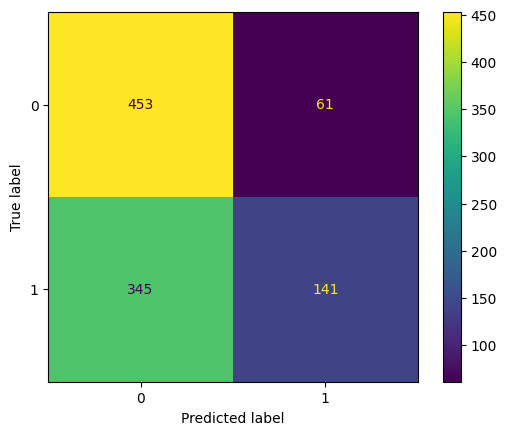

In [41]:
tree = DecisionTreeClassifier(max_depth=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
tree.fit(X_train, y_train)

predictions = tree.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print("Precision: ", cm)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()